<a href="https://colab.research.google.com/github/Maksimka9/clustering-diploma-/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задачи:

1. Пороговое значение - больше половины
2. Разметить все кластеры, взяв за начальные значения первый семестр
3. Применить модель прогнозирования кол-ва студентов
---
Алгоритм:

-Взять первый семестр за изначальные значения

-Для каждого кластера найти такой, в который он перешел больше чем на половину

-Остальным дать новые номера


Проблема: Кластер получен из двух больших частей других кластеров.

Решение: Отметить тем номером, элементов которого больше

In [ ]:
# Подключение модулей (библиотек)

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
# Загрузка данных по семестрам

sem_1_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_1.csv?raw=true"
sem_2_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_2.csv?raw=true"
sem_3_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_3.csv?raw=true"
sem_4_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_4.csv?raw=true"
sem_5_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_5.csv?raw=true"
sem_6_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_6.csv?raw=true"
sem_7_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_7.csv?raw=true"
sem_8_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_8.csv?raw=true"

df_sem_1 = pd.read_csv(sem_1_data, index_col=False)
df_sem_2 = pd.read_csv(sem_2_data, index_col=False)
df_sem_3 = pd.read_csv(sem_3_data, index_col=False)
df_sem_4 = pd.read_csv(sem_4_data, index_col=False)
df_sem_5 = pd.read_csv(sem_5_data, index_col=False)
df_sem_6 = pd.read_csv(sem_6_data, index_col=False)
df_sem_7 = pd.read_csv(sem_7_data, index_col=False)
df_sem_8 = pd.read_csv(sem_8_data, index_col=False)
df_sem_1

,hash,subj_административное право,subj_академическая живопись,subj_академический рисунок,subj_академический рисунок и скульптура,subj_актуальные вопросы финансов,subj_актуальные проблемы финансов,subj_алгебра логики и дискретный анализ,subj_анализ статистической информации с помощью пакетов прикладных программ,subj_аналитическая геометрия,...,subj_экономическая социология в россии,subj_экономическая теория,subj_элективные курсы по физической культуре,subj_элективные курсы по физической культуре и спорту,subj_электротехника и электроника,subj_электротехника и электронная техника,subj_элементы высшей математики,subj_этика делового общения,subj_этика деловых отношений,subj_языки высокого уровня
0,0x000DE9673F941872AFFC6EF39B3B0EEAC868BA3B,0,0,0,0,0,0,0,0,5,...,0,0,0,5,0,0,0,0,0,4
1,0x00153956450F17DDD7C0610CF52E1476DE4E65E8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0x0019D4D822B0D9A3DD3336438904749E38147903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0x001D374A732EE3FE32F65550A2D7E970C5EB7AE1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0x0026AD5250A4C255F6687FBE6292D8EBE10915E7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,0xFFE57CD000A9958C3DB006F2EC9264E6874616AB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9848,0xFFEE3249B0511C419EF4CA031FA2F2A19C26B2F6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9849,0xFFEFB385175A8D99A1FCBBE7805433B9BBF68D28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9850,0xFFF3F87B5BE639E7AA3FB301DA2FD48D2074D648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Вспомогательная таблица для сопоставления меток класса с хэш-номером студентов

hash_df_1 = df_sem_1[['hash']]
hash_df_2 = df_sem_2[['hash']]
hash_df_3 = df_sem_3[['hash']]
hash_df_4 = df_sem_4[['hash']]
hash_df_5 = df_sem_5[['hash']]
hash_df_6 = df_sem_6[['hash']]
hash_df_7 = df_sem_7[['hash']]
hash_df_8 = df_sem_8[['hash']]
hash_df_4

,hash
0,0x000DE9673F941872AFFC6EF39B3B0EEAC868BA3B
1,0x00153956450F17DDD7C0610CF52E1476DE4E65E8
2,0x0019D4D822B0D9A3DD3336438904749E38147903
3,0x0026AD5250A4C255F6687FBE6292D8EBE10915E7
4,0x003E178322849C3A0C8CED05322BA8F0509FEFC9
...,...
8827,0xFFE57CD000A9958C3DB006F2EC9264E6874616AB
8828,0xFFEE3249B0511C419EF4CA031FA2F2A19C26B2F6
8829,0xFFEFB385175A8D99A1FCBBE7805433B9BBF68D28
8830,0xFFF3F87B5BE639E7AA3FB301DA2FD48D2074D648


In [ ]:
# Нормализуем данные (среднее значение=0, дисперсия=1)

from sklearn.preprocessing import StandardScaler

standart_data_1 = StandardScaler().fit_transform(df_sem_1.iloc[:,1:])
standart_data_2 = StandardScaler().fit_transform(df_sem_2.iloc[:,1:])
standart_data_3 = StandardScaler().fit_transform(df_sem_3.iloc[:,1:])
standart_data_4 = StandardScaler().fit_transform(df_sem_4.iloc[:,1:])
standart_data_5 = StandardScaler().fit_transform(df_sem_5.iloc[:,1:])
standart_data_6 = StandardScaler().fit_transform(df_sem_6.iloc[:,1:])
standart_data_7 = StandardScaler().fit_transform(df_sem_7.iloc[:,1:])
standart_data_8 = StandardScaler().fit_transform(df_sem_8.iloc[:,1:])

standart_data_list = [standart_data_1, standart_data_2, standart_data_3, standart_data_4, 
                    standart_data_5, standart_data_6, standart_data_7, standart_data_8]

standart_data_3

array([[-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391],
       [-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391],
       [-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391],
       ...,
       [-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391],
       [-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391],
       [-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391]])

In [ ]:
# Применяем PCA к кластеризованным данным
from sklearn.decomposition import PCA

# Выбираем кол-во компонент, которые нужно оставить, и сами данные
reduced_df_1 = PCA(n_components=2).fit_transform(standart_data_1)
reduced_df_2 = PCA(n_components=2).fit_transform(standart_data_2)
reduced_df_3 = PCA(n_components=2).fit_transform(standart_data_3)
reduced_df_4 = PCA(n_components=2).fit_transform(standart_data_4)
reduced_df_5 = PCA(n_components=2).fit_transform(standart_data_5)
reduced_df_6 = PCA(n_components=2).fit_transform(standart_data_6)
reduced_df_7 = PCA(n_components=2).fit_transform(standart_data_7)
reduced_df_8 = PCA(n_components=2).fit_transform(standart_data_8)

# Превращаем результаты обратно в удобный вид
reduced_df_1 = pd.DataFrame(reduced_df_1) 
reduced_df_2 = pd.DataFrame(reduced_df_2)
reduced_df_3 = pd.DataFrame(reduced_df_3)
reduced_df_4 = pd.DataFrame(reduced_df_4)
reduced_df_5 = pd.DataFrame(reduced_df_5)
reduced_df_6 = pd.DataFrame(reduced_df_6)
reduced_df_7 = pd.DataFrame(reduced_df_7)
reduced_df_8 = pd.DataFrame(reduced_df_8)

reduced_df_list = [reduced_df_1, reduced_df_2, reduced_df_3, reduced_df_4,
                   reduced_df_5, reduced_df_6, reduced_df_7, reduced_df_8]

reduced_df_2

,0,1
0,0.871771,0.298670
1,1.755445,0.517033
2,-4.176573,-1.143901
3,-2.336142,-0.655918
4,0.993312,0.435048
...,...,...
9693,1.477654,1.021246
9694,1.690258,0.952680
9695,10.554966,-6.385777
9696,-0.325301,-0.050578


In [ ]:
# Подсчёт метрик качества кластеризации, чтобы понять насколько хорошо была проведена кластеризация.


# Создание словаря для значений метрик по каждому кластеру
silhouette_dict = {}
calinski_score_dict = {}
davies_score_dict = {}


n = 1 # Значение нужно для вывода графиков

for table in standart_data_list:
  for k in range(2, 35):
    agglom_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=k) # Создаём экземпляр класса, где указываем кол-во кластеров
    clusters = agglom_clustering.fit_predict(table) # Вычисляем к какому элементу отнести каждый кластер

    # Запись данных во вспомогательный словарь
    transfer_list_silhouette = {k: sklearn.metrics.silhouette_score(table, clusters)}
    transfer_list_calinski = {k: sklearn.metrics.calinski_harabasz_score(table, clusters)}
    transfer_list_davies = {k: sklearn.metrics.davies_bouldin_score(table, clusters)}
    # Перенос данных в главные словари
    silhouette_dict.update(transfer_list_silhouette)
    calinski_score_dict.update(transfer_list_calinski)
    davies_score_dict.update(transfer_list_davies)
    # Удаление вспомогательных словарей
    del(transfer_list_silhouette)
    del(transfer_list_calinski)
    del(transfer_list_davies)
  

  # Создание pandas dataframe из словарей
  silhouette_df = pd.DataFrame.from_dict(silhouette_dict, orient='index') 
  calinski_df = pd.DataFrame.from_dict(calinski_score_dict, orient='index')
  davies_df = pd.DataFrame.from_dict(davies_score_dict, orient='index')


  plt.figure(figsize=(18, 23))

  # Вывод графиков метрик по всем семестрам
  plt.subplot(8, 3, n)
  plt.plot(silhouette_df.index, silhouette_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Коэффициент силуэта')
  plt.subplot(8, 3, n+1)
  plt.plot(calinski_df.index, calinski_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Метрика Калински-Харабаза')
  plt.subplot(8, 3, n+2)
  plt.plot(davies_df.index, davies_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Метрика Дэвиса-Боулдина')
  n += 3


In [ ]:
# Проведение финальной кластеризации дл фиксированного кол-ва кластеров по каждому семестру

processed_df_list = []
processed_df_dict = {'processed_df_1':15, 'processed_df_2':8, 'processed_df_3':10, 'processed_df_4':5,
                     'processed_df_5':12, 'processed_df_6':18, 'processed_df_7':17, 'processed_df_8':8}


# Вычисление кластера для каждого элемента

for key in processed_df_dict.keys():
  agglom_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters = processed_df_dict[key])
  processed_df = agglom_clustering.fit_predict(standart_data_list[int(key[-1])-1]) 
  processed_df_list.append(processed_df)

# Превращение NumPy array (в данном случае вектор) в pandas DataFrame
labels_df_1 = pd.DataFrame(processed_df_list[0], columns = ['labels'])
labels_df_2 = pd.DataFrame(processed_df_list[1], columns = ['labels'])
labels_df_3 = pd.DataFrame(processed_df_list[2], columns = ['labels'])
labels_df_4 = pd.DataFrame(processed_df_list[3], columns = ['labels']) 
labels_df_5 = pd.DataFrame(processed_df_list[4], columns = ['labels'])
labels_df_6 = pd.DataFrame(processed_df_list[5], columns = ['labels'])
labels_df_7 = pd.DataFrame(processed_df_list[6], columns = ['labels'])
labels_df_8 = pd.DataFrame(processed_df_list[7], columns = ['labels'])

processed_df_list

[array([0, 5, 5, ..., 2, 5, 5]),
 array([0, 0, 4, ..., 2, 0, 4]),
 array([0, 0, 0, ..., 4, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 5, 0, ..., 0, 0, 0]),
 array([ 0, 10,  0, ...,  0,  0,  0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

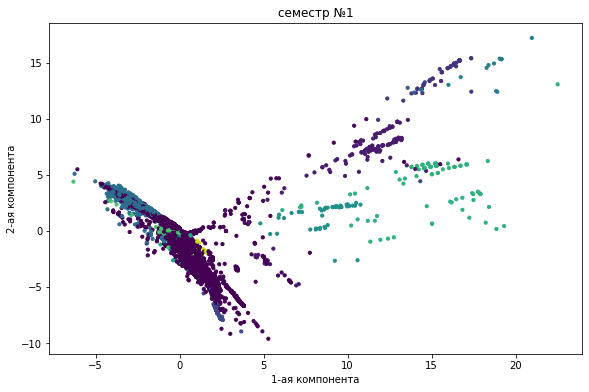

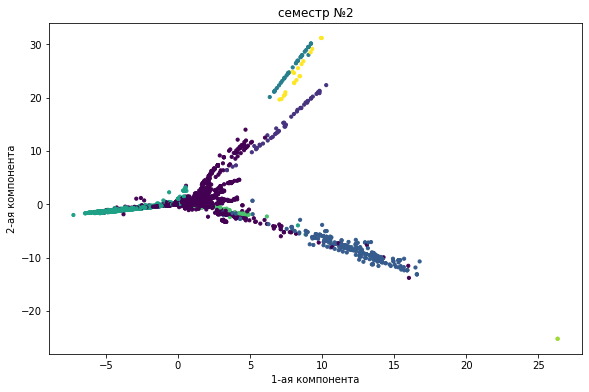

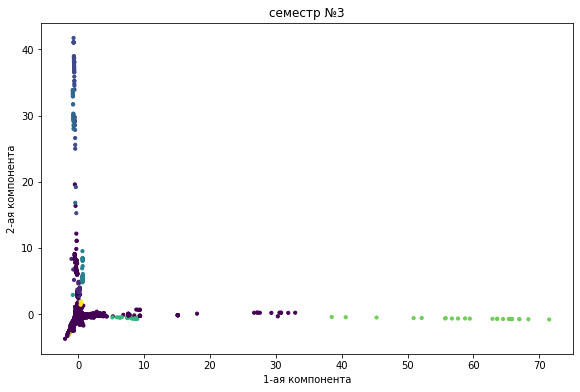

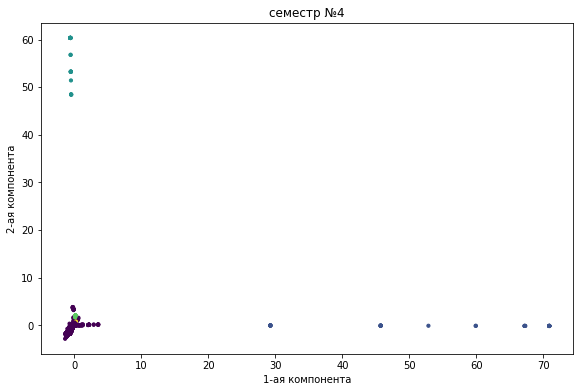

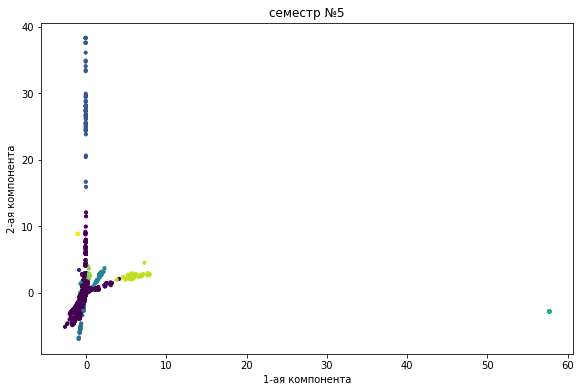

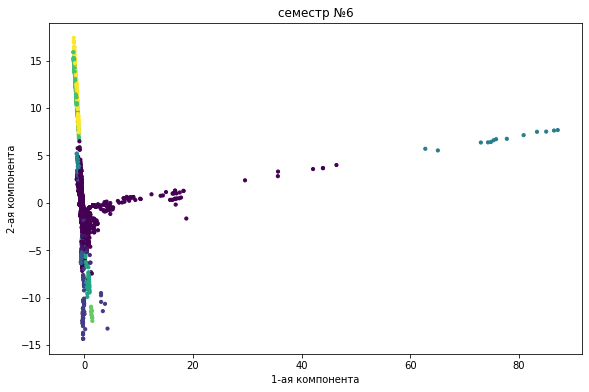

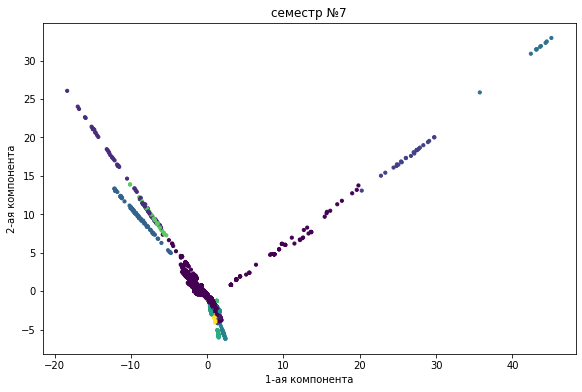

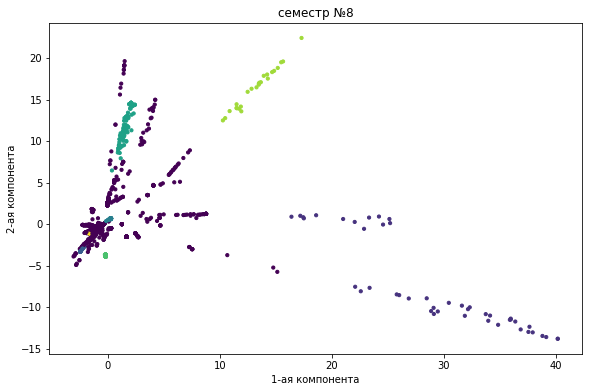

In [ ]:
# Отображение набора данных, используя разные цвета для разных кластеров

n = 1

for number in range(0, len(processed_df_list)):
  plt.figure(figsize=(21, 28))
  graph = plt.subplot(4, 2, 1)
  graph.scatter(reduced_df_list[number][0], reduced_df_list[number][1], c = processed_df_list[number], s=10) # с - используемые цвета
  plt.xlabel('1-ая компонента')
  plt.ylabel('2-ая компонента')
  graph.set_title('семестр №'+str(n))
  n+=1
  plt.show()

In [ ]:
# Соединение меток кластера и хеш-кодов

hash_df_1['labels']  = labels_df_1.loc[:, 'labels'] 
hash_df_2['labels']  = labels_df_2.loc[:, 'labels'] 
hash_df_3['labels']  = labels_df_3.loc[:, 'labels'] 
hash_df_4['labels']  = labels_df_4.loc[:, 'labels'] 
hash_df_5['labels']  = labels_df_5.loc[:, 'labels'] 
hash_df_6['labels']  = labels_df_6.loc[:, 'labels'] 
hash_df_7['labels']  = labels_df_7.loc[:, 'labels'] 
hash_df_8['labels']  = labels_df_8.loc[:, 'labels'] 

hash_df_list = [hash_df_1, hash_df_2, hash_df_3, hash_df_4,
                hash_df_5, hash_df_6, hash_df_7, hash_df_8]


In [ ]:
compare_list = []

for i in range(0, len(hash_df_list)-1):
  compare_labels_df = hash_df_list[i].merge(hash_df_list[i+1], on = 'hash', how = 'inner')
  compare_labels_df = compare_labels_df.rename(columns={'labels_x':'labels_sem_'+str(i+1),'labels_y':'labels_sem_'+str(i+2)})
  compare_list.append(compare_labels_df)

compare_list[5]

,hash,labels_sem_6,labels_sem_7
0,0x000DE9673F941872AFFC6EF39B3B0EEAC868BA3B,10,0
1,0x00153956450F17DDD7C0610CF52E1476DE4E65E8,0,0
2,0x0019D4D822B0D9A3DD3336438904749E38147903,0,0
3,0x003E178322849C3A0C8CED05322BA8F0509FEFC9,0,0
4,0x0046D462B1EE0E8EE887B1AF95768432839F6FD2,0,0
...,...,...,...
5223,0xFFE4BF6168739B932FF933F81DE6F6B3AD030DDE,3,1
5224,0xFFE56CEE7D9B14429E6ABEF3B70A689DECEDB808,0,0
5225,0xFFE57CD000A9958C3DB006F2EC9264E6874616AB,0,0
5226,0xFFF3F87B5BE639E7AA3FB301DA2FD48D2074D648,0,0


In [ ]:
# Сделать таблицы для всех пересечений семестров с помощью цикла

compare_list[0].groupby(['labels_sem_1', 'labels_sem_2']).count() # Сделать groupby зависящим от номеров стобцов

In [ ]:
group_df = pd.DataFrame(compare_labels_df.groupby(['labels_sem_1', 'labels_sem_2']))
group_df

In [ ]:
# Выделение массива меток кластеров

np.array(compare_list[0]['labels_sem_1'])

array([1, 0, 0, ..., 4, 0, 0], dtype=int32)

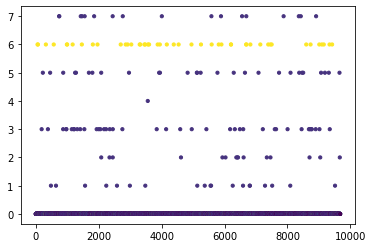

In [ ]:
# Возможно убрать эту ячейку?

plt.scatter(compare_list[0].index, compare_list[0]['labels_sem_2'], c=compare_list[0]['labels_sem_1'], s=10)